<h1 style="color:#009ADE"><center>Topic Modeling with SVD</center></h1>
<h1 style="color:#009ADE"><center>tl;dr</center></h1>

<h3 style="color:#226E9C"><center>By: Christie Ngo, Wesley Tat, Wendy Zhai</center></h3>

### Introduction

As part of daily life for many people, reading lengthy sets of documents is a crucial yet tedious activity. Whether it be reading text messages, news articles, research papers, or textbooks, we do not have time to carefully dissect each media. Reading takes up a tremendous amount of effort and time. Politicians, researchers, and students, to name a few groups of people, are all in need of an efficient solution to laboring over required readings. They all want to save time to pursue other activities. The purpose of the project is to create a function that extracts the main topic(s) from sets of text documents. This function's goal would allow readers to quickly grasp the main focus of news articles, without reading through the entire articles; thus, time is saved and only key topics are looked at in depth.
“Tl;dr” stands for “too long didn’t read,” and it is defined as a response to the author after a long text, long article, or long message or  a summary from the author to give the reader a condensed version of the message to save time. We will go with the latter definition. The function is going to be a “tl;dr” function that essentially gives us a list of topics. 

We seek to help readers minimize their efforts by using topic modeling with singular value decomposition. Topic modeling is an unsupervised machine learning technique where we are feeding in raw, unlabelled data. This raw, unlabelled data is the set of documents we are getting from either a dataset or from an application programming interface (APIs) of news sources. Topic modeling will cluster similar word groups and give the best words that summarize a group of documents. After vectorizing the text data with the TFIDF vectorizer, we apply svd to get the right singular vector matrix, which we will eventually use for finding significant terms for each topic.

The dataset we are using is a kaggle dataset with British Broadcasting articles from 2004-2005 with different genres. The genres that we are going to perform tl;dr function on business, entertainment, politics, and tech. We are also going to analyze Guardian's news articles with their API. Google News API grants us another source of articles that we will analyze. 


### Proposed Method

The algorithm we are using for topic modeling is called “Latent Semantic Analysis,” which is based off of Singular Value Decomposition (SVD). We decided to code the SVD function ourselves to gain a better understanding of how the algorithm works. We are using power iteration to obtain the eigenvector-value pairs, which will be used to calculate the left singular vector matrix (U), singular values (S), and right singular vector matrix. 

Source: https://towardsdatascience.com/simple-svd-algorithms-13291ad2eef2

For a Matrix $A$, we can decompose it into a product of three matrix: 
$$A=U \Sigma V'$$
Where $U$ and $V$ are orthogonal matrices and $\Sigma$ is a diagonal matrix with singular values in decreasing order.

Since both $U$ and $V$ are orthogonal, we know that:
$$A'A = V \Sigma U'U \Sigma V'$$
$$A'A = V \Sigma^2 V'$$
And,
$$AA' = U \Sigma V'V \Sigma U'$$
$$AA' = U \Sigma^2 U'$$
From the above formula, we can derive that $V$ contains the eigenvectors of $A'A$, with $\Sigma^2$ as the corresponding eigenvalues. $U$ contains the eigenvectors of $AA'$, with $\Sigma^2$ as the corresponding eigenvalues.

In order to find $U$ and $V$, we need to find the eigenvector-value pairs for $AA'$ and $A'A$. In this project, we choose to use Power Method to find the largest eigen pair. We then will subtract the eigen pair from the matrix, and then find the next largest eigen pair. Repeating this process, we eventually find all the eigen pairs.

To use Power Method to find eigen pairs for matrix A, we need to assume:
* A is symmetrix
* A is PSD

1) Choose a initial of the eigen vector $q$

2) Iterate the following process:
$$z^k = Aq^{k-1}$$
$$q^k = \frac{z^k}{||z^k||_2}$$

We iterate until $||q^k-q^{k-1}||_2 < \epsilon$

We know that singular values are the squareroot of eigenvalues, in the same order.


In our case, $V$ represents the term topic matrix. It gives us the information of which terms are significant for different topics. Using truncated SVD, we get the top k terms for each topic.


Before we can train our model on the set of articles, we need to process the data. A table is shown below to summarize how to process and standardize the set of articles. 

Essentially, we need to tokenize the text by separating it into individual words that will generate the model vocabulary. We use lowercasing to standardize the words and avoid double counting with different forms of a word. For example, if the word is hello, the model will identify “Hello” and “hello” as different words when they are the same. We remove punctuation and special characters as they are not necessary for word analysis and for topic modeling. Additionally, white spaces characters, such as “\n” and “\r”, are removed. Next, we will lemmatize/stem the words to obtain the base words. This is the portion of the word that provides its meaning. For example, the word “run” and “running” are the same word but with different tenses. After we process the articles, we put it in a long string with all sentences to feed into the sklearn TF-IDF function. 

We use sklearn’s feature extraction from Python to run the text through the TF-IDF vectorizer. Then we take the fit transform function and vectorize our text. Plugging this term-document matrix into our own SVD function, we obtain the right singular matrix with the most popular topics. We obtain the vocabulary from our model and iterate through the matrices of the “n” most popular topics (we used the top 4 in our WordClouds). 

### Data Analysis Study

Because we are working with unsupervised learning, it is difficult to measure how well our function performed when considering the main topics. Even with other builtin vectorizing methods, there will be variance in the exact phrasing of core topics due to differences in modeling algorithms and vocabulary creation. Furthermore, we could not exactly separate the articles without reading through them to split them in a balanced manner. The slight variations in the topic cannot be determined unless the article is read thoroughly. 

As a simple yet unbiased method of simulating topics from the sets of articles, we chose to randomly select one sentence from each article. From these sentences, we will randomly select 4 different 7 word phrases and see how extensively they cover the same topics returned from our model. 

### Summary

Because we are working with unsupervised learning, it is difficult to measure how well our function performed when considering the main topics. Even with other builtin vectorizing methods, there will be variance in the exact phrasing of core topics due to differences in modeling algorithms and vocabulary creation. Furthermore, we could not exactly separate the articles without reading through them to split them in a balanced manner. The slight variations in the topic cannot be determined unless the article is read thoroughly. 

As a simple yet unbiased method of simulating topics from the sets of articles, we chose to randomly select one sentence from each article. From these sentences, we will randomly select 4 different 7 word phrases by using our random_topics() function and see how extensively they cover the same topics returned from our model. We tested this on the Met Gala API articles.

In [35]:
simulate_topics = random_topics(df["blocks"], 4)
simulate_topics

['of his coat read “End Gun ',
 'drinks at the leaving event for ',
 'and social media has blown good ',
 'she was too shy to talk ']

In [38]:
simulate_topics2 = random_topics(df["blocks"], 4)
simulate_topics2

['considering or would not support the ',
 'to do that, just contact your ',
 'against his shareholding in Tesla and ',
 'trailblazed by the Met, is dressing ']

To assess how efficiently our tl;dr function performed, we needed to consider the number of articles fed into the function and determine whether or not the summaries were sufficient enough to understand the core topics without reading it. We created WordClouds to visualize the topics of varying sets of articles. 

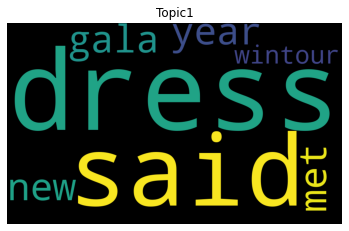

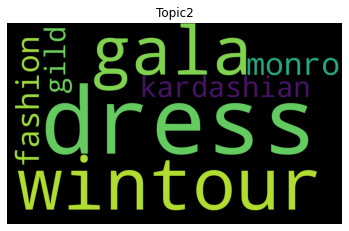

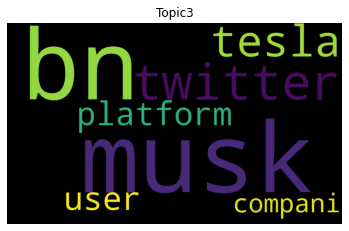

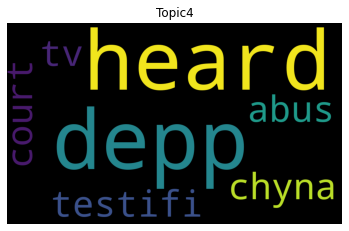

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(4):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topics_list[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

We started with the Met Gala articles within the first week of may, retrieved using the Guardian API. After preprocessing and training our model, we returned the following topics:  
- "dress said year met gala new wintour"
- "dress wintour gala monro fashion kardashian gild"
- "musk bn twitter tesla platform user compani"
- "depp heard testifi chyna tv court abus"

In addition to covering the Met Gala with the theme Gilded Ages, we discussed the editor in chief of Vogue, Anna Wintour, and the reality TV star, Kim Kardashian, wearing the iconic Marilyn Monroe dress. News published around this time included Elon Musk purchasing Twitter and the Johnny Depp v. Amber Heard televised defamation hearings. We suspect that the latter two topics were returned because their TF-IDF scores were high. The terms were especially important to the fewer articles they appeared in. The details were not covered by the random topics. These randomly selected topics were only vaguely related to the Met Gala and Elon Musk.

The Google News API only returned the first 260 characters without a paid subscription. We were still curious if the first few sentences would adequately introduce the primary topics. Looking up news articles with the search query “Asian” to see if there will articles on AAPI month (May) in addition to news related to Asian countries, we returned the following topics:
- "affili asianamerican becom buy commiss common earn"
- "cup host covid afc countri right china"
- "place communiti pandem citi asian chines right"
- "news provid live south everi reuter world"

The articles related to this search discussed Asian-Americans, China, the COVID pandemic, and Qatar hosting the 2022 World Cup. If we were to repeat this project, we would choose an API that returned more content and also refine the web-scraping methods; we would like to prevent headlines and irrelevant side information from being returned.

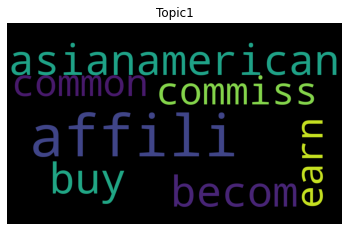

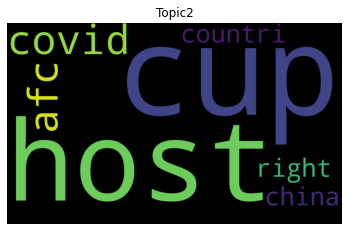

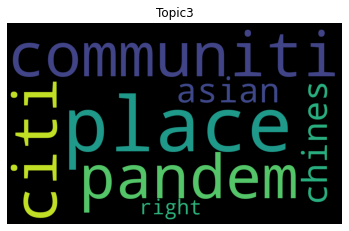

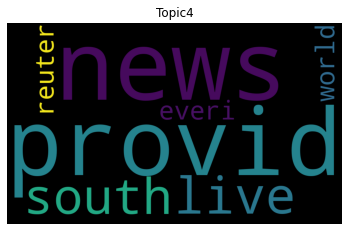

In [32]:
for i in range(4):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topics2[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

We used a dataset from Kaggle composed of various genres including: business, entertainment, politics, sport, and tech. Each genre has around 400-600 articles related to its topic and to standardize it, we only used the first 200 articles. This also helps with how many documents we plug into the SVD function as it is a power method which could take a long time depending on the input. One potential solution for this problem could be to use a block version of the power method to compute eigenvectors and eigenvalues. Block power method could compute several eigenvectors at the same time. This could increase the efficiency of our program. If we were to redo this project, we would choose to replace the power method with the block power method.

Shown below is the result from the business tl;dr, entertainment tl;dr, politics tl;dr, and tech tl;dr.

Looking at business tl;dr output, we get: 

- '23bn 961 apologise arise assign darleen espionage'
- 'yukos yugansk court russian rosneft mr ebbers'
- 'fiat ebbers worldcom mr gm car sullivan'
- 'ebbers worldcom mr sullivan fraud rate accounting'

The result of the tl;dr function for the 200 business article gives us important words from the 200 new articles about business. We can gain a sense of what is going on but not enough to truly understand the core topics. The words are more targetted for someone of the audience who is already following business and has prior knowlegde to it. As it is talking about the Russian court and Sullivan fraud, which is not helpful to the average reader but to someone who is already following business.

Looking at entertainment tl;dr output, we get:

- '  film best award say year oscar star',
- '  chart number single band album record song',
- '  film festival say office box sequel weekend',
- '  number office box christmas chart weekend sequel'

We can get a better understanding of what the entertainment genre of 200 articles is telling us, but not enough to the point that we do not need to read the articles to get the core topics. However, it does give a better summary than business as there is more common words and is for a more broad audience.

Looking at the politics tl;dr output, we get:

- '  say mr blair government labour people lord',
- '  mr brown blair election asylum tax howard',
- '  hunt brown tax election aid africa chancellor',
- '  child school pension woman health scottish wait'

We have a pattern that is similar to the business articles as the topics and words are more for a targetted audience, people who already follow politics and understand what is going on in their country. Since this is British Broadcasting politics section, it is going to be focused on United Kingdom and their politics reporting. 

Looking at the tech tl;dr output, we get:

- '  afghanistan akaev askar assure backslide contrary cuticle',
- '  game nintendo sony title award console sale',
- '  phone mobile broadband 3g bt service handset',
- '  phone mobile virus program spyware security microsoft'

Out of the 200 technology articles from dataset, the summary is not enough to be deemed a tl;dr as the average reader will not know anything but gaming and phones. There are other topics that the average reader will need know the context to understand what is going on. 

Overall for analysis of different genres with 200 articles, the tl;dr result is not ideal as it chooses the most important words that would require context of the entire article. The words chosen tend to not give a great summary. Most of it requires to have some prior knowledge to understand the tl;dr. 


We also created the word cloud for each genre to the topics of varying sets of articles for easier viewing and seeing which word is more important as the larger word is more dominant term.

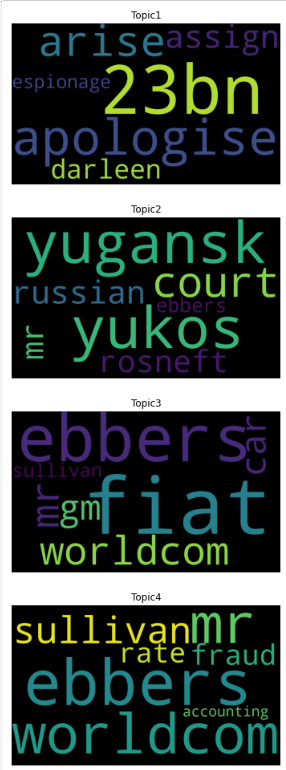

In [4]:
business_word_clouds

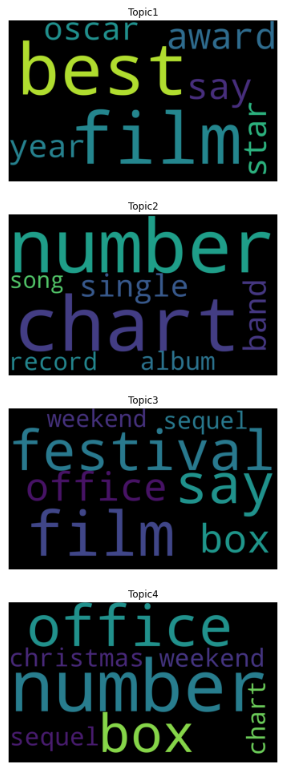

In [36]:
entertainment_word_clouds

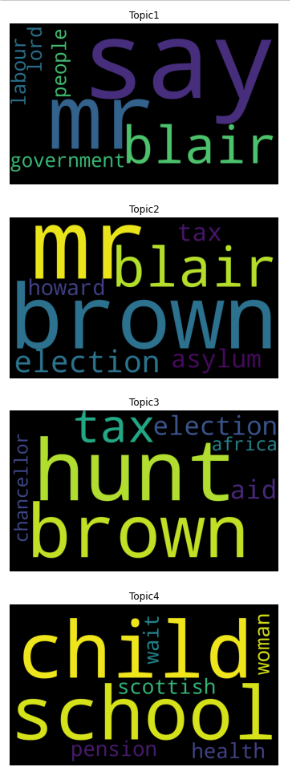

In [37]:
politics_word_clouds

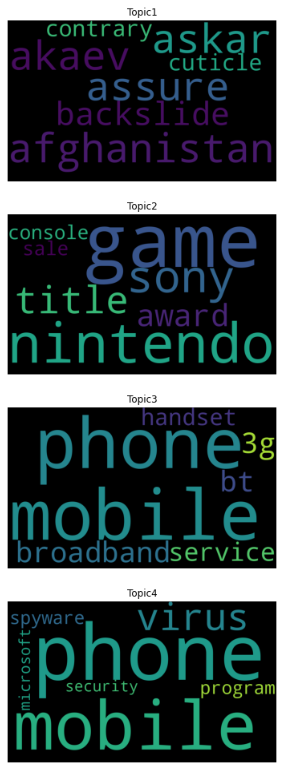

In [38]:
tech_word_clouds 

### Conclusion
Ultimately, as the number of articles increased, we achieved a lower accuracy of concise yet representative topics returned. For example, looking at the Met Gala from the Guardian News API that returned 21 articles, we can see that it gave a detailed summary of the range of topics. However, when we increased to 200 articles, the words appeared to be more random and less closely related to each other; they did not summarize the 200 articles accurately for the readers. The results will clearly reiterate that the topics were business-related but could not inform a reader on what the key takeaways based on the 200 articles.
We need to refine the tl;dr model by approaching a different training model and a different set of metrics to measure performance. After doing additional research into Latent Sentiment Analysis, we discovered that clustering each set of documents will show how much the articles varied from each other. This is a method we could implement to assess our model in a more quantitative way.

*tl;dr: Our model does a good job highlighting topics for smaller sets of articles but terms are vague for bigger numbers.*

### Reference and Acknowledgement

- https://towardsdatascience.com/simple-svd-algorithms-13291ad2eef2
- https://www.kaggle.com/code/shehneelhasham/apis-introduction-and-json-guardian-example/notebook
- https://www.analyticsvidhya.com/blog/2021/09/latent-semantic-analysis-and-its-uses-in-natural-language-processing/
- https://hackernoon.com/advanced-topic-modeling-tutorial-how-to-use-svd-and-nmf-in-python-to-find-topics-in-text
- https://sebastianraschka.com/Articles/2014_multiprocessing.html
- https://monkeylearn.com/blog/introduction-to-topic-modeling/ 

### *Appendix*

### SVD Function

In the SVD function, we use the columns of one singular vector matrix (U or V depending on the dimension of the given matrix) to find the corresponding singular value and other singular vector. This allows us to use the power method once instead of twice for each iteration, which increases the efficiency for our program.

In [2]:
import numpy as np
from random import normalvariate
from math import sqrt

In [3]:
Y = np.array([[1,2,4,7,3,6],[2,3,2,1,5,9],[1,5,6,3,8,2]])

In [4]:
Y.shape

(3, 6)

In [5]:
def UnitVector(n):
    '''
    create a random unit vector of size n
    '''
    rand_vec = [normalvariate(0, 1) for i in range(n)]
    norm = np.linalg.norm(rand_vec)
    u_vec = [x/norm for x in rand_vec]
    return u_vec

In [6]:
UnitVector(5)

[-0.23028049894219071,
 -0.6804621118200278,
 0.3420212607028225,
 -0.010353346761263184,
 -0.6056867768264852]

In [7]:
def eigen_vec(A, eps=1e-9):
    '''
    power iteration to get eigen vector for A
    '''
    
    n = A.shape[0]
    m = A.shape[1]
    # create random unit vector
    x = UnitVector(min(n,m))
    
    prev_V = None
    cur_V = x
    
    if n > m:
        W = np.dot(A.T, A)
    else:
        W = np.dot(A, A.T)
    
    # power iteration
    while True:
        prev_V = cur_V
        temp = np.dot(W, prev_V)
        cur_V = temp / np.linalg.norm(temp)

        if (1 - eps) < abs(np.dot(cur_V, prev_V)):
            return cur_V

In [8]:
eigen_vec(Y)

array([-0.55688484, -0.57062041, -0.60354919])

In [9]:
def svd(A, eps=1e-9):
    '''
    Compute svd of a matrix A
    '''
    
    n = A.shape[0]
    m = A.shape[1]
    
    svd_decomp = []
    # contains tuples of u,s,v

    k = min(n, m)

    for i in range(k):
        
        A_copy = A.copy()
        
        for u, s, v in svd_decomp[:i]:
            # subtract all the vectors we have calculated so far
            A_copy = A_copy - s * np.outer(u, v)

        if n > m:
            
            v = eigen_vec(A_copy, eps=eps) 
            # find the next eigenvector
            u_temp = np.dot(A, v)
            sigma = np.linalg.norm(u_temp) # the norm is the next eigenvalue
            u = u_temp/sigma
            
        else:
            
            u = eigen_vec(A_copy, eps=eps)  
            # find the next eigenvector
            v_temp = np.dot(A.T, u)
            sigma = np.linalg.norm(v_temp)  # the norm is the next eigenvalue
            v = v_temp/sigma

        svd_decomp.append((u, sigma, v))

    U, S, V = [np.array(i) for i in zip(*svd_decomp)]
    
    
    return U.T, S, V

In [10]:
svd(Y)

(array([[ 0.55688443, -0.23722141, -0.79599355],
        [ 0.57061894, -0.58711843,  0.57418288],
        [ 0.60355096,  0.7739625 ,  0.19159408]]),
 array([17.5777686 ,  6.52149665,  5.14705086]),
 array([[ 0.13094229,  0.33243016,  0.39766602,  0.35723891,  0.53204453,
          0.55092197],
        [-0.09775299,  0.25055819,  0.38651442,  0.0113807 ,  0.39016253,
         -0.79114805],
        [ 0.10568504,  0.21148653, -0.17214595, -0.85932505,  0.39161968,
          0.15054694]]))

In [11]:
np.linalg.svd(Y, full_matrices=False)

(array([[-0.55688569,  0.23727197,  0.7959776 ],
        [-0.5706228 ,  0.58707584, -0.57422258],
        [-0.60354614, -0.77397931, -0.19154134]]),
 array([17.5777686 ,  6.52149665,  5.14705085]),
 array([[-0.13094253, -0.3324296 , -0.39766511, -0.3572388 , -0.53204365,
         -0.55092383],
        [ 0.0977451 , -0.25057516, -0.38651194, -0.0113407 , -0.39019254,
          0.79113063],
        [-0.10569332, -0.21146463,  0.17217961,  0.85932639, -0.39158556,
         -0.15061446]]))

### News API Topic Modeling

In [12]:
import requests 
import json
import random
random.seed(2)

In [13]:
import pandas as pd
with open('guardian.txt', 'r') as file:
    key = file.read().rstrip()

In [14]:
# function referenced from : https://www.kaggle.com/code/shehneelhasham/apis-introduction-and-json-guardian-example/notebook

def guardian_search(api_key, search_query, from_date, to_date):
    url = 'http://content.guardianapis.com/search?q='
    query = search_query.replace(' ', '%20') 
    final_url = url + query + '&from-date=' + from_date + '&to-date=' + to_date + '&page-size=100' + '&show-blocks=body' + '&api-key=' + api_key
    response = requests.get(final_url)
    data = response.content.decode('utf-8')
    return data

In [15]:
met22 = guardian_search(key, 'met gala', '2022-05-01', '2022-05-08')
met_ex = json.loads(met22) 
results = met_ex['response']['results']
df = pd.DataFrame(results, columns=['id', 'type', 'sectionId', 'sectionName', 'blocks'])
df['blocks'] = pd.json_normalize(df["blocks"])
df["blocks"] = [row[0]['bodyTextSummary'] for row in df["blocks"]]
df = df[df["blocks"] != '']

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re

In [17]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')

In [18]:
def clean_text(string, stemmer):
    newstring = re.sub(r'[^\w\s]', '', string.lower()) # removes all not word or whitespace + lowercase
    finalstring = ''
    newstring = re.sub(r'[^a-zA-z.,!?/:;\"\'\s]', '', newstring)
    for word in newstring.split():
        clean_word = snow_stemmer.stem(word)
        finalstring += clean_word + ' '
    return finalstring

In [19]:
cleaned_df = pd.DataFrame()
cleaned_df['text'] = [clean_text(row, lemmatizer) for row in df["blocks"]]

In [20]:
compiled_text = list(cleaned_df["text"])
cleaned_df

,text
0,and that a wrap the met gala red carpet is slo...
1,organ of the met gala are weather widespread c...
2,polit person contemporari and histor were clos...
3,kim kardashian has appear on the met gala red ...
4,this was the night the met gala brought marily...
5,what to wear to a parti vex the best of us but...
6,amid a global econom downturn and worsen infla...
7,gild glamour was the theme of last week met ga...
8,if you googl bad bunni aka yearold puerto rica...
9,mani column inch have been fill this week with...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True) 
textinput = vectorizer.fit_transform(compiled_text).todense()

NameError: name 'compiled_text' is not defined

In [12]:
def get_topics(components, vocab): 
    # from https://hackernoon.com/advanced-topic-modeling-tutorial-how-to-use-svd-and-nmf-in-python-to-find-topics-in-text
    word_list = []
    for i, comp in enumerate(components):
        terms_comp = zip(vocab,comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        topic=" "
        for t in sorted_terms:
            topic= topic + ' ' + t[0]
        word_list.append(topic)
    return word_list

In [23]:
def tl_dr(text):
    vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True) 
    textinput = vectorizer.fit_transform(text).todense()
    u,s,vt = svd(np.array(textinput))
    topic_matrix = vt[:4,:]
    vocab = vectorizer.get_feature_names()
    return(get_topics(topic_matrix, vocab))

In [24]:
topics_list = tl_dr(compiled_text)

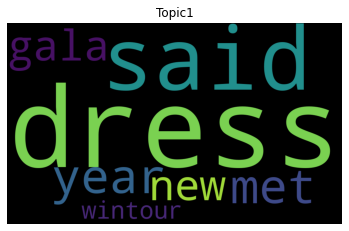

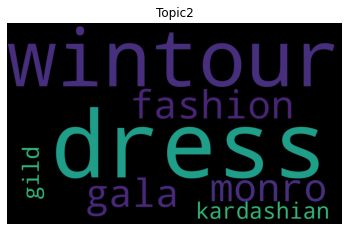

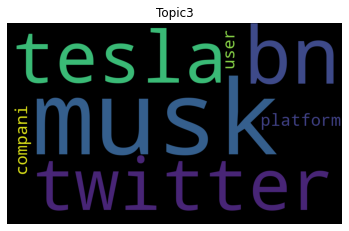

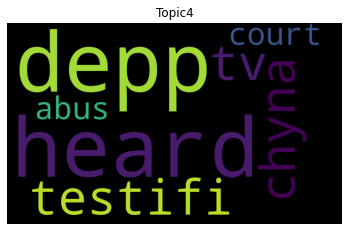

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(4):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topics_list[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

In [26]:
import pandas as pd
with open('googlenews.txt', 'r') as file:
    google_key = file.read().rstrip()

In [27]:
def googlenews_search(api_key, search_query, min_date, max_date):
    url = 'https://newsapi.org/v2/everything?q='
    query = search_query.replace(' ', '%20') 
    final_url = url + query + '&from=' + min_date + '&to=' + max_date + '&apiKey=' + api_key
    response = requests.get(final_url)
    data = response.content.decode('utf-8')
    return data

In [28]:
aapi = googlenews_search(google_key, 'asian', '2022-05-07', '2022-06-06');
gn_ex = json.loads(aapi) 

In [29]:
results = gn_ex['articles']
content_list = [article['content'] for article in results]
gn_content = pd.DataFrame(content_list)
cleaned_gn = pd.DataFrame()
cleaned_gn['text'] = [clean_text(row, lemmatizer) for row in gn_content[0]]
gn_text = list(cleaned_gn["text"])

In [30]:
vectorizer2 = TfidfVectorizer(stop_words='english',smooth_idf=True) 

In [31]:
topics2 = tl_dr(gn_text)

In [ ]:
for i in range(4):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topics2[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

In [42]:
topics2

['  affili asianamerican becom buy commiss common earn',
 '  cup host covid afc countri right china',
 '  place communiti pandem citi asian chines right',
 '  news provid live south everi reuter world']

### Simulation Study

In [33]:
import os
import multiprocessing as mp

In [34]:
def random_topics(corpus, n_topics):
    rand_sent = []
    phrase_list = []
    used = []
    for sentence in corpus:
        line = random.randrange(0, len(sentence.split(".")))
        rand_sent.append(sentence.split(".")[line])
        
    for i in range(n_topics):
        sent = random.randrange(0, len(rand_sent)-1)
        line = rand_sent[sent]
        used.append(sent)
        while len(line.split()) < 7 and sent in used:
            sent = random.randrange(0, len(rand_sent)-1)
            line = rand_sent[sent]
            used.append(sent)
        index = random.randrange(0, len(line.split())-7)
        phrase_list.append(line.split()[index:index+6])
    string = ""
    topics = []
    for phrase in phrase_list:
        string = ""
        for word in phrase:
            string+= word + " "
        topics.append(string)
    return topics

### British Broadcasting Article

In [34]:
#importing all required documents
from IPython.display import Image
import nltk.corpus
import nltk
import re
import pandas as pd
from nltk.corpus import wordnet
import glob
import os
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
import string
import numpy as np
import numpy as np
from random import normalvariate
from math import sqrt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import time
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def UnitVector(n):
    '''
    create a random unit vector of size n
    '''
    rand_vec = [normalvariate(0, 1) for i in range(n)]
    norm = np.linalg.norm(rand_vec)
    u_vec = [x/norm for x in rand_vec]
    return u_vec

def eigen_vec(A, eps=1e-9):
    '''
    power iteration to get eigen vector for A
    '''
    
    n = A.shape[0]
    m = A.shape[1]
    # create random unit vector
    x = UnitVector(min(n,m))
    
    prev_V = None
    cur_V = x
    
    if n > m:
        W = np.dot(A.T, A)
    else:
        W = np.dot(A, A.T)
    
    # power iteration
    while True:
        prev_V = cur_V
        temp = np.dot(W, prev_V)
        cur_V = temp / np.linalg.norm(temp)

        if (1 - eps) < abs(np.dot(cur_V, prev_V)):
            return cur_V
def svd(A, eps=1e-9):
    '''
    Compute svd of a matrix A
    '''
    
    n = A.shape[0]
    m = A.shape[1]
    
    svd_decomp = []
    # contains tuples of u,s,v

    k = min(n, m)

    for i in range(k):
        
        A_copy = A.copy()
        
        for u, s, v in svd_decomp[:i]:
            # subtract all the vectors we have calculated so far
            A_copy = A_copy - s * np.outer(u, v)

        if n > m:
            
            v = eigen_vec(A_copy, eps=eps) 
            # find the next eigenvector
            u_temp = np.dot(A, v)
            sigma = np.linalg.norm(u_temp) # the norm is the next eigenvalue
            u = u_temp/sigma
            
        else:
            
            u = eigen_vec(A_copy, eps=eps)  
            # find the next eigenvector
            v_temp = np.dot(A.T, u)
            sigma = np.linalg.norm(v_temp)  # the norm is the next eigenvalue
            v = v_temp/sigma

        svd_decomp.append((u, sigma, v))

    U, S, V = [np.array(i) for i in zip(*svd_decomp)]
    
    
    return U.T, S, V

def wordnet_pos(tag): #this function is used to convert a brown pos tag to a wordnet pos tag
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN) 


def text_files(textfiles, folder):
    """
    Get the textfiles and then have word process them and create new ones
    Input is the location of all textfiles
    Folder is where you want the new textfiles with all the word processing added to 
    """
    counter = 0 
    #going through each for loop and then 
    for i in textfiles:
        counter += 1
        #we open the text file to read
        f = open(i,'r')
        #get the title so we can name the file later
        firstLine = f.readline()
        #get all the lines
        lines = f.readlines()
        #combine them into a string
        lines = "".join(lines)
        #so we can word process
        updatedlines = nltk.sent_tokenize(lines) 
        new_list = []
        for i in updatedlines:
            new_list.append(i.strip())
        #making it lower, replacing some whitespaces, then finding the word tokenize 
        lower_sent = [sent.lower() for sent in new_list]
        lower_sent = [i.replace("\r\n"," ") for i in lower_sent]
        lower_sent = [i.replace("\\","") for i in lower_sent]
        individual = []
        for i in lower_sent:
            individual.append(nltk.word_tokenize(i))
        individual
        stopwords = ['.',"''",",","``",'!','""',"","'s"] #making a list of things that are not words to erase
        words = [] #only words are in here, before there were punctunations that were 
        for i in range(len(individual)):
            for j in individual[i]:
                if j not in stopwords: 
                    words.append(j)
        stopwords_nltk = nltk.corpus.stopwords.words("english") #using nltk.corpus list of stopwords
        nowords = [w for w in words if w not in stopwords_nltk] #took out the stopwords first
        lemmatizer = nltk.WordNetLemmatizer() #implementing the lemmatizer, better than stemming
        article_update = [] #creating a list to hold words without their suffix and prefixes 
        tense_words = nltk.pos_tag(nowords) #getting the brownnet_tags 
        tense_words = [(word, wordnet_pos(t)) for (word, t) in tense_words] #getting the wordnet form which are for Noun, Verb, etc..
        tense_wordsv2 = [lemmatizer.lemmatize(word, t) for (word, t) in tense_words]
        stopwords_nltk = nltk.corpus.stopwords.words("english") #using nltk.corpus list of stopwords
        article = [w for w in tense_wordsv2  if w not in stopwords_nltk] #took out the words that dont contribute meaning
        article_updated = " ".join(article)
        text_file = open(str(folder) + str(counter)+ 
                    "-" + firstLine.strip().replace("?","") + ".txt", "w")
        open_filed = text_file.write(article_updated)
        text_file.close()
        
        
def compiling_text(articles_list_updated):    
    """
    takes in the new processed articles to compile the text into one giant string. 
    """
    compiled_text = []
    #go through each text files and add it to one giant text
    for i in articles_list_updated:
        f = open(i,'r')
        compiled_text.append(f.readlines()[0])      
    return compiled_text
#reading in thje word clouds to avoid showing the code
business_word_clouds= Image('Business_Articles.png')
entertainment_word_clouds= Image('Entertainment_Articles.png')
politics_word_clouds = Image("Politics_Articles.png")
tech_word_clouds = Image('Tech_Articles.png')


[nltk_data] Downloading package wordnet to C:\Users\Wesley
[nltk_data]     Tat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Wesley
[nltk_data]     Tat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Wesley Tat\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
#find where all the unprocessed text files are 
textfiles = glob.glob("C:\\Users\\Wesley Tat\\STA141C Project\\business\\*.txt")
#using the function to make new text files with processed data
text_files(textfiles, "C:\\Users\\Wesley Tat\\STA141C Project\\Articles\\")

In [8]:
textfiles = glob.glob("C:\\Users\\Wesley Tat\\STA141C Project\\entertainment\\*.txt")
text_files(textfiles, "C:\\Users\\Wesley Tat\\STA141C Project\\Articles2\\")

In [9]:
textfiles = glob.glob("C:\\Users\\Wesley Tat\\STA141C Project\\politics\\*.txt")
text_files(textfiles, "C:\\Users\\Wesley Tat\\STA141C Project\\Articles3\\")

In [10]:
textfiles = glob.glob("C:\\Users\\Wesley Tat\\STA141C Project\\tech\\*.txt")
text_files(textfiles, "C:\\Users\\Wesley Tat\\STA141C Project\\Articles4\\")

In [30]:
articles_list_business = glob.glob("C:\\Users\\Wesley Tat\\STA141C Project\\Articles\\*.txt")
compiled_text_business = compiling_text(articles_list_business)
topic_list_business = tl_dr(compiled_text_business)

In [31]:
topic_list_business

['  23bn 961 apologise arise assign darleen espionage',
 '  rate growth economy rise figure quarter economic',
 '  yukos yugansk rosneft russian oil court rate',
 '  ebbers worldcom mr sullivan fraud rate accounting']

In [19]:
articles_list_entertainment = glob.glob("C:\\Users\\Wesley Tat\\STA141C Project\\Articles2\\*.txt")
compiled_text_entertainment = compiling_text(articles_list_entertainment)
topic_list_entertainment = tl_dr(compiled_text_entertainment)

In [20]:
topic_list_entertainment

['  660 advisory brownsville contain deceived eliminate evanescence',
 '  best film award oscar actor swank director',
 '  film festival say office box sequel weekend',
 '  bbc say tv book music winner award']

In [16]:
articles_list_politics = glob.glob("C:\\Users\\Wesley Tat\\STA141C Project\\Articles3\\*.txt")
compiled_text_politics = compiling_text(articles_list_politics)
topic_list_politics = tl_dr(compiled_text_politics)

In [17]:
topic_list_politics

['  say mr blair government labour people lord',
 '  mr brown blair election asylum tax howard',
 '  hunt brown tax election aid africa chancellor',
 '  child school pension woman health scottish wait']

In [18]:
articles_list_tech = glob.glob("C:\\Users\\Wesley Tat\\STA141C Project\\Articles4\\*.txt")
compiled_text_tech = compiling_text(articles_list_tech)
topic_list_tech = tl_dr(compiled_text_tech)

In [21]:
topic_list_tech

['  afghanistan akaev askar assure backslide contrary cuticle',
 '  game nintendo sony title award console sale',
 '  phone mobile broadband 3g bt service handset',
 '  phone mobile virus program spyware security microsoft']

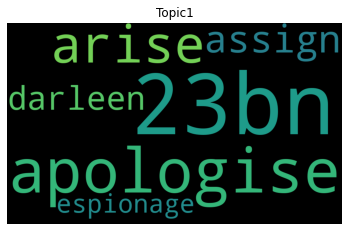

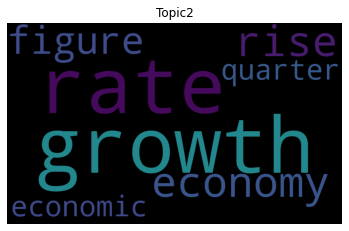

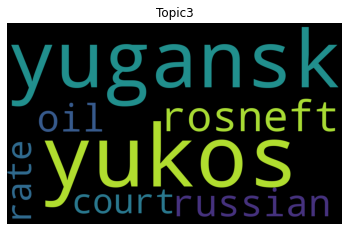

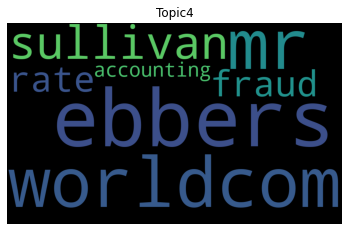

In [32]:
for i in range(4):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,
                   background_color='black', relative_scaling=0).generate(topic_list_business[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

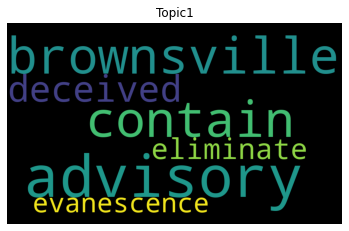

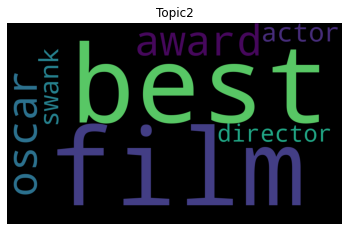

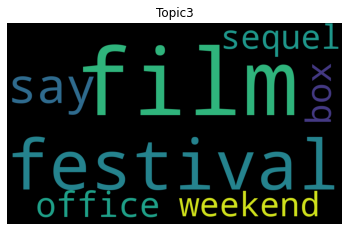

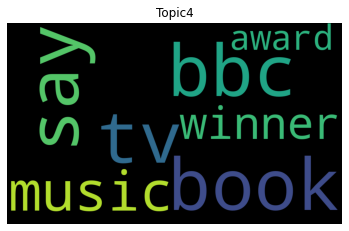

In [26]:
for i in range(4):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,
                   background_color='black', relative_scaling=0).generate(topic_list_entertainment[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

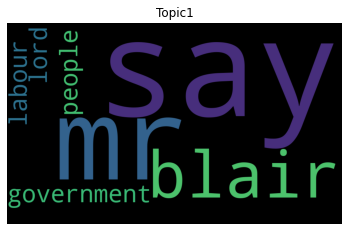

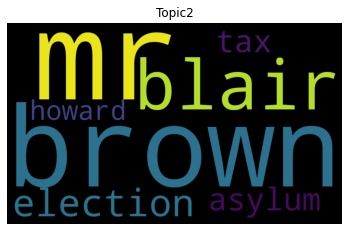

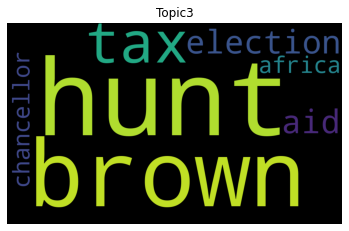

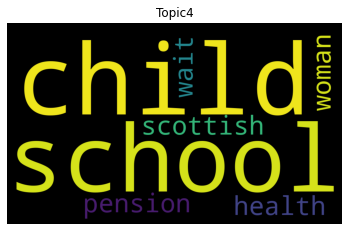

In [27]:
for i in range(4):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,
                   background_color='black', relative_scaling=0).generate(topic_list_politics[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

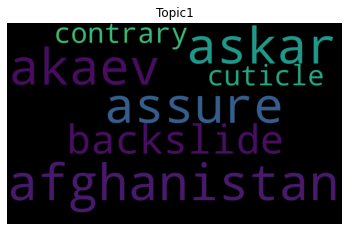

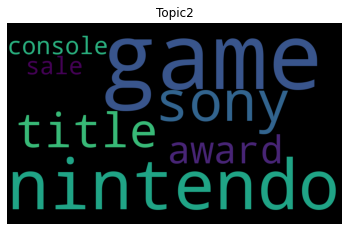

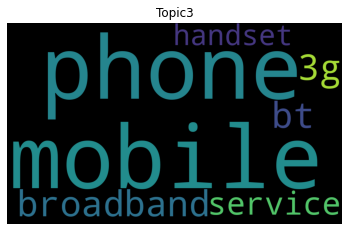

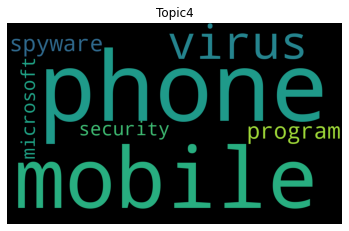

In [28]:
for i in range(4):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,
                   background_color='black', relative_scaling=0).generate(topic_list_tech[i])
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()